# Heat treatment on detection of SARS-CoV-2, FluA, FluB and RSV targets by Seegene Combo kit
## by Melissa Caza
## July 2021

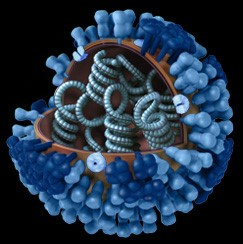
### 3D representation of the Influenza A virus. 


In [1]:
import pandas as pd
import altair as alt
from vega_datasets import data
from altair.expr import datum


In [2]:
alt.renderers.enable ('default')



RendererRegistry.enable('default')

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
SG_combokit_df = pd.read_excel('Seegene_combokit_stipped.xlsx', sheet_name='NPS HI')
SG_combokit_df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sample         220 non-null    int64  
 1   Specimen type  220 non-null    object 
 2   Gene           220 non-null    object 
 3   Ct value       218 non-null    float64
 4   Treatment      220 non-null    object 
 5   RDRP Mean      47 non-null     float64
 6   RDRP  St.D     47 non-null     float64
 7   RDRP %CV       47 non-null     float64
 8   RDRP ∆C(t)     47 non-null     float64
 9    N Mean        47 non-null     float64
 10   N St.D        47 non-null     float64
 11   N %CV         47 non-null     float64
 12  N ∆C(t)        47 non-null     float64
dtypes: float64(9), int64(1), object(3)
memory usage: 22.5+ KB


In [5]:
x_order = ['Neat', 'Heat inactivated']
grouped_A = SG_combokit_df[SG_combokit_df['Gene'] == 'Flu A']
fluA_point = alt.Chart(grouped_A, title='Flu A (n=5)').mark_point(size=50).encode(alt.X('Treatment', title='Treatment', sort= x_order,axis=alt.Axis(titleFontSize=16, labelFontSize=14, tickCount=4, labelAngle=0)),
                                                      alt.Y('Ct value:Q', title=None, scale=alt.Scale(domain=[20,36]), axis=alt.Axis(titleFontSize=16, labelFontSize=14 )),
                                                        alt.Color('Sample:N', legend=None), 
                                                           )
                                                          
fluA_line= alt.Chart(grouped_A).mark_line().encode(alt.X('Treatment', title='Treatment',sort= x_order, axis=alt.Axis(titleFontSize=16, labelFontSize=14, tickCount=4)),
                                                      alt.Y('Ct value:Q', title='Ct value', axis=alt.Axis(titleFontSize=16, labelFontSize=14)),
                                                        alt.Color('Sample:N', legend=None), 
                                                           )                                                  

fluA_plot = (fluA_point + fluA_line).properties(width=150, height = 300)
fluA_plot


grouped_B = SG_combokit_df[SG_combokit_df['Gene'] == 'Flu B']
fluB_point = alt.Chart(grouped_B, title='Flu B (n=5)').mark_point(size=50).encode(alt.X('Treatment', title=None, sort= x_order,axis=alt.Axis(titleFontSize=16, labelFontSize=14, tickCount=4, labelAngle=0)),
                                                      alt.Y('Ct value:Q', title=None, scale=alt.Scale(domain=[20,36]), axis=alt.Axis(titleFontSize=16, labelFontSize=14  )),
                                                        alt.Color('Sample:N', legend=None), 
                                                           )
                                                          
fluB_line= alt.Chart(grouped_B).mark_line().encode(alt.X('Treatment', title='Treatment',sort= x_order, axis=alt.Axis(titleFontSize=16, labelFontSize=14, tickCount=4)),
                                                      alt.Y('Ct value:Q', title='Ct value', axis=alt.Axis(titleFontSize=16, labelFontSize=14)),
                                                        alt.Color('Sample:N', legend=None), 
                                                           )                                                  

fluB_plot = (fluB_point + fluB_line).properties(width=150, height = 300)
fluB_plot


grouped_rsv = SG_combokit_df[SG_combokit_df['Gene'] == 'RSV']
rsv_point = alt.Chart(grouped_rsv, title='RSV (n=4)').mark_point(size=50).encode(alt.X('Treatment', title=None, sort= x_order,axis=alt.Axis(titleFontSize=16, labelFontSize=14, tickCount=4, labelAngle=0)),
                                                      alt.Y('Ct value:Q', title=None, scale=alt.Scale(domain=[20,36]), axis=alt.Axis(titleFontSize=16, labelFontSize=14 )),
                                                        alt.Color('Sample:N', legend=None), 
                                                           )
                                                          
rsv_line= alt.Chart(grouped_rsv).mark_line().encode(alt.X('Treatment', title='Treatment',sort= x_order, axis=alt.Axis(titleFontSize=16, labelFontSize=14, tickCount=4)),
                                                      alt.Y('Ct value:Q', title='Ct value', axis=alt.Axis(titleFontSize=16, labelFontSize=14)),
                                                        alt.Color('Sample:N', legend=None), 
                                                           )                                                  

rsv_plot = (rsv_point + rsv_line).properties(width=150, height = 300)
rsv_plot

fluA_plot| fluB_plot| rsv_plot

alt.HConcatChart(...)

In [6]:
SG_combokit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sample         220 non-null    int64  
 1   Specimen type  220 non-null    object 
 2   Gene           220 non-null    object 
 3   Ct value       218 non-null    float64
 4   Treatment      220 non-null    object 
 5   RDRP Mean      47 non-null     float64
 6   RDRP  St.D     47 non-null     float64
 7   RDRP %CV       47 non-null     float64
 8   RDRP ∆C(t)     47 non-null     float64
 9    N Mean        47 non-null     float64
 10   N St.D        47 non-null     float64
 11   N %CV         47 non-null     float64
 12  N ∆C(t)        47 non-null     float64
dtypes: float64(9), int64(1), object(3)
memory usage: 22.5+ KB


In [7]:
rdrp_drop = SG_combokit_df.dropna(subset=['Ct value'])
rdrp_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 219
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sample         218 non-null    int64  
 1   Specimen type  218 non-null    object 
 2   Gene           218 non-null    object 
 3   Ct value       218 non-null    float64
 4   Treatment      218 non-null    object 
 5   RDRP Mean      47 non-null     float64
 6   RDRP  St.D     47 non-null     float64
 7   RDRP %CV       47 non-null     float64
 8   RDRP ∆C(t)     47 non-null     float64
 9    N Mean        47 non-null     float64
 10   N St.D        47 non-null     float64
 11   N %CV         47 non-null     float64
 12  N ∆C(t)        47 non-null     float64
dtypes: float64(9), int64(1), object(3)
memory usage: 23.8+ KB


In [8]:
x_order = ['Neat', 'Heat inactivated']
grouped_rdrp = rdrp_drop[rdrp_drop['Gene'] == 'RdRP']
rdrp_point = alt.Chart(grouped_rdrp, title='RdRP (n=47)').mark_point(size=50).encode(alt.X('Treatment', title=None, sort= x_order,axis=alt.Axis(titleFontSize=16, labelFontSize=14, tickCount=4, labelAngle=0)),
                                                      alt.Y('Ct value:Q', title= None, scale=alt.Scale(domain=[8,40]), axis=alt.Axis(titleFontSize=16, labelFontSize=14 )),
                                                        alt.Color('Sample:N', legend=None), 
                                                           )
                                                          
rdrp_line= alt.Chart(grouped_rdrp).mark_line().encode(alt.X('Treatment', title='Treatment',sort= x_order, axis=alt.Axis(titleFontSize=16, labelFontSize=14, tickCount=4)),
                                                      alt.Y('Ct value:Q', title='Ct value', axis=alt.Axis(titleFontSize=16, labelFontSize=14)),
                                                        alt.Color('Sample:N', legend=None), 
                                                           )                                                  

rdrp_plot = (rdrp_point + rdrp_line).properties(width=150, height = 300)
rdrp_plot

grouped_n = rdrp_drop[rdrp_drop['Gene'] == 'N gene']
n_point = alt.Chart(grouped_n, title='N gene (n=47)').mark_point(size=50).encode(alt.X('Treatment', title=None, sort= x_order,axis=alt.Axis(titleFontSize=16, labelFontSize=14, tickCount=4, labelAngle=0)),
                                                      alt.Y('Ct value:Q', title='Ct value', scale=alt.Scale(domain=[8,40]), axis=alt.Axis(titleFontSize=16, labelFontSize=14 )),
                                                        alt.Color('Sample:N', legend=None), 
                                                           )
                                                          
n_line= alt.Chart(grouped_n).mark_line().encode(alt.X('Treatment', title='Treatment',sort= x_order, axis=alt.Axis(titleFontSize=16, labelFontSize=14, tickCount=4)),
                                                      alt.Y('Ct value:Q', title='Ct value', axis=alt.Axis(titleFontSize=16, labelFontSize=14)),
                                                        alt.Color('Sample:N', legend=None), 
                                                           )                                                  

n_plot = (n_point + n_line).properties(width=150, height = 300)
n_plot

n_plot | rdrp_plot

alt.HConcatChart(...)

## Equation of the mean

$$\bar{x} = \frac {x_1 + x_2 +... + x_n}{n} \tag{1} \label{mean}  $$

## Standard deviation of the mean



$$ s = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2} \tag{2} \label{Sdv} $$





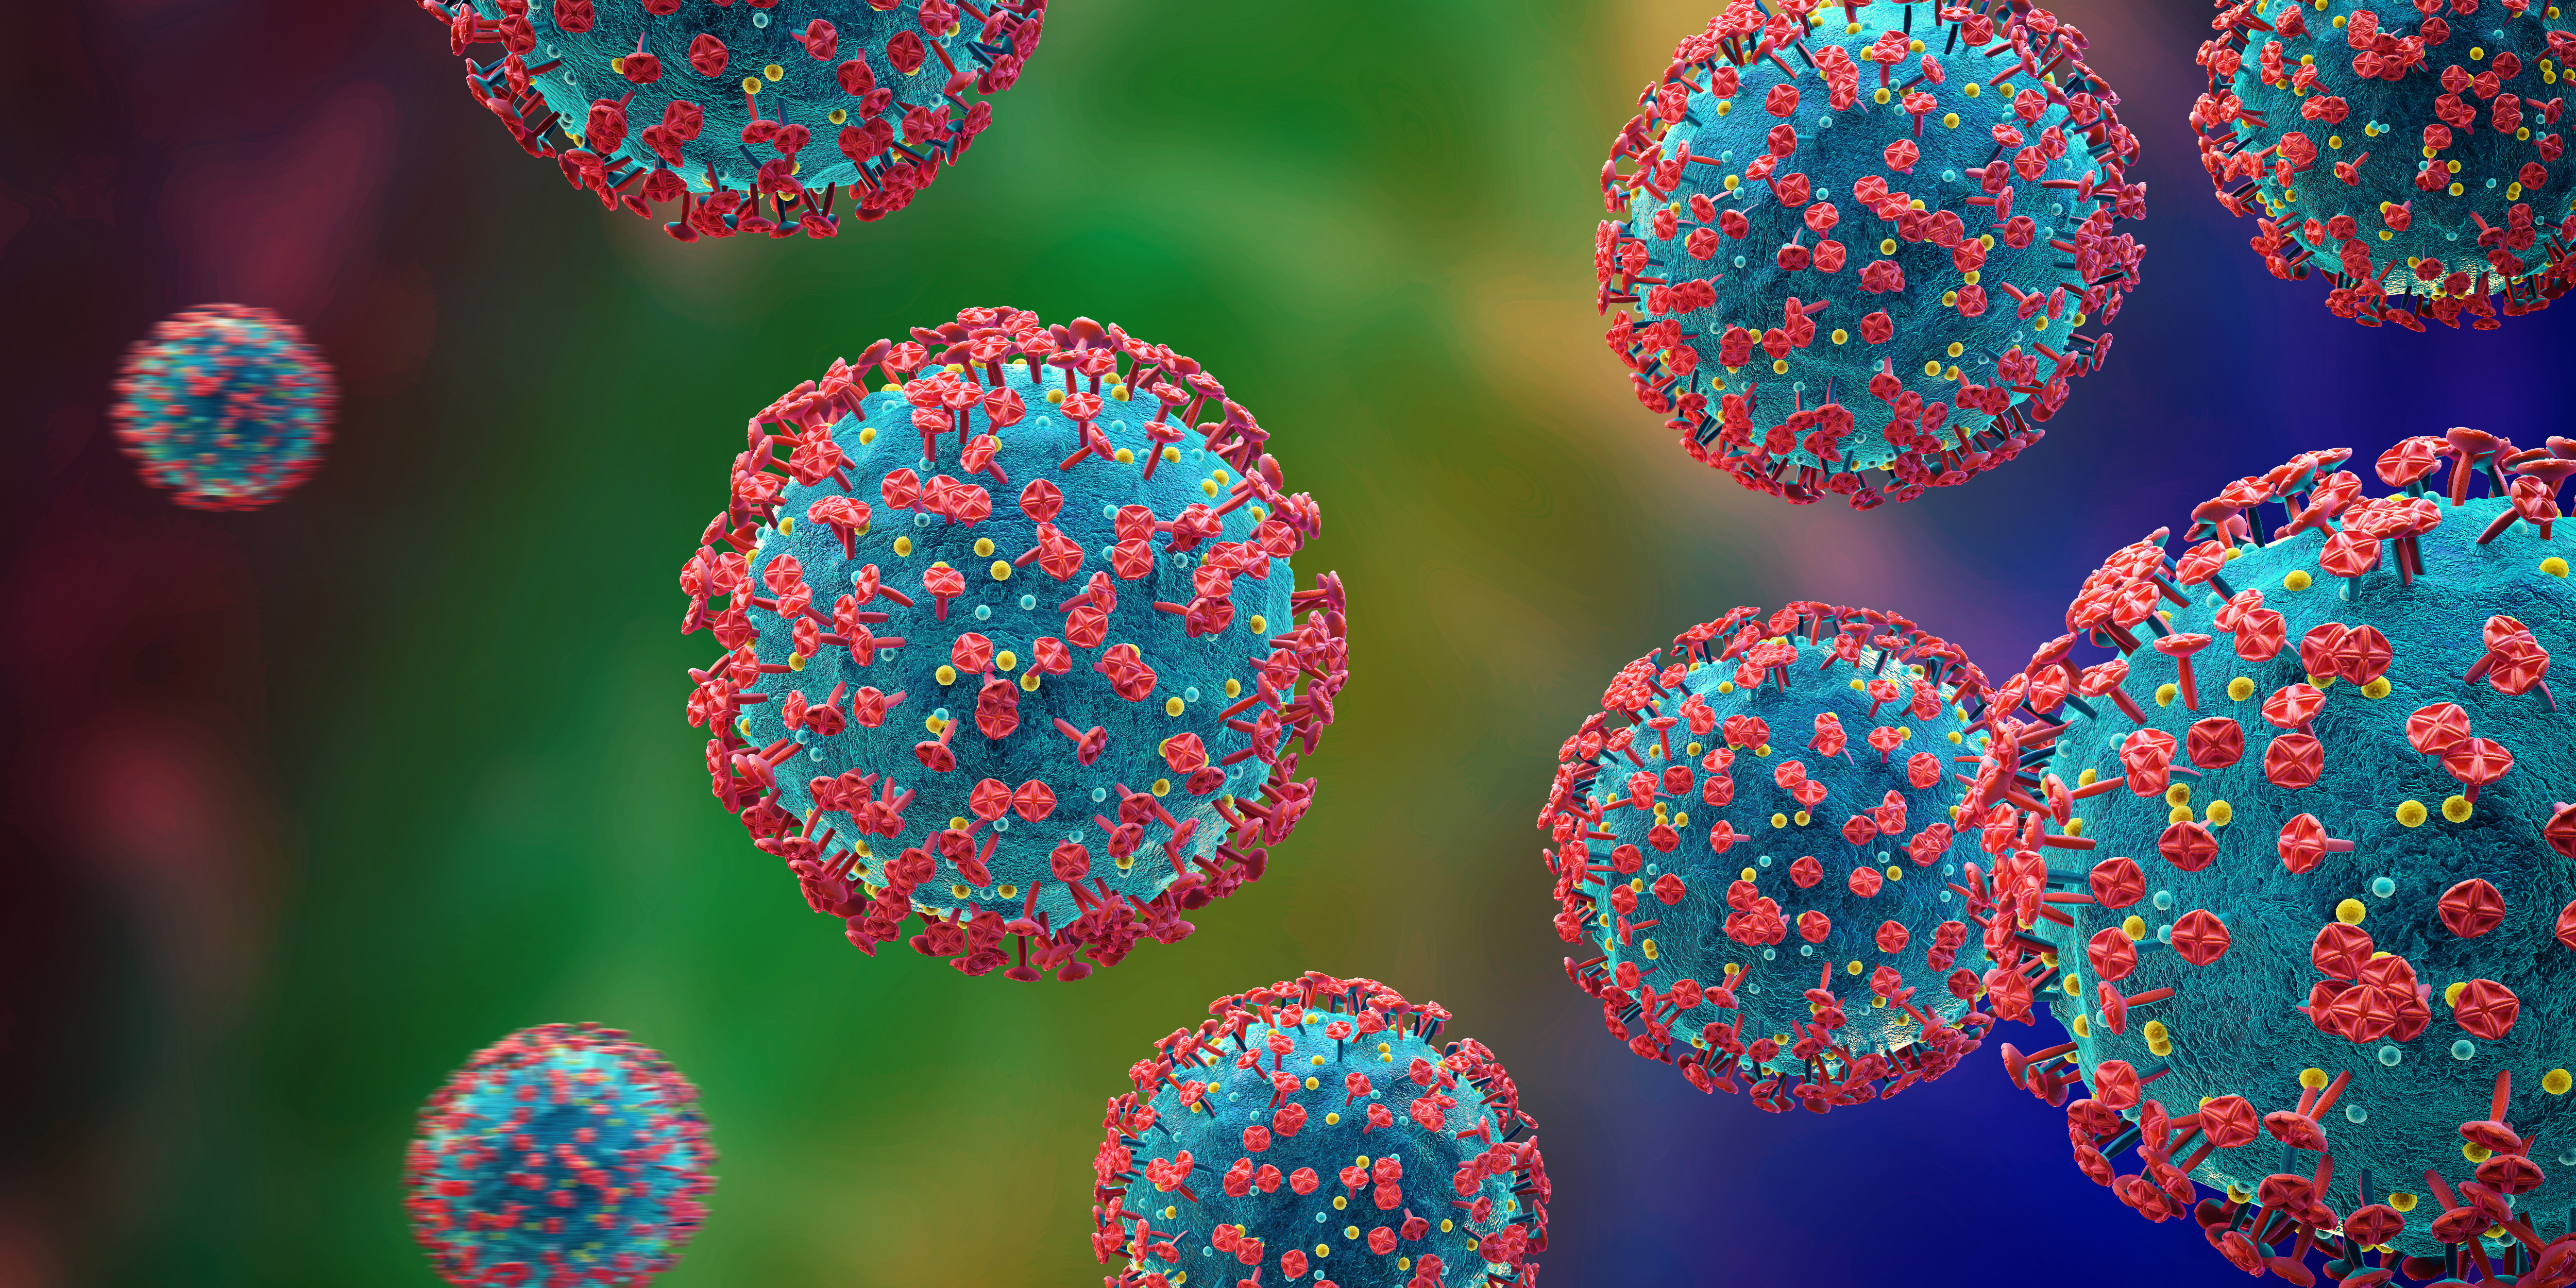
## Respiratory viruses